# Motivação & Problema

Algoritmos genéticos são ferramentas muito poderosas para solucionar problemas de otimização restrita. Tão cedo quando na década de 50, Turing já propusera <citar data-cite="turing2009computing">[I.A.]</citar> em seu seminal artigo sobre inteligência artificial, *Computing Machinery and Intelligence*, que processos análogos aos que são observados na evolução natural poderiam ser empregados para aumentar a complexidade dos problemas que máquinas são capazes de resolver.

A primeira implementação desta ideia de forma funcional vem a partir de Holland <citar data-cite="holland1992adaptation">[adaptação]</citar> e suas aplicações em problemas de otimização e aprendizado de máquina são trazidas por Goldberg <citar data-cite="goldenberg1989genetic">[gas]</citar>. As contribuições de ambos autores servem de base para o artigo intitulado *Topological Optimum Design using Genetic Algorithms* por Kane e Schoenauer <citar data-cite="kane1996topological">[ecole]</citar> tomado como principal referência durante a composição deste ensaio.

O modo de operar de um algoritmo genético é conceitualmente simples: uma estrutura de dados que carrega informação na forma de um código simula o material genético de um organismo vivo que dá origem a um conjunto de parâmetros análogos às características únicas de uma expressão fenotípica. Estes parâmetros, ou características, são submetidos a um equacionamento do problema que se almeja resolver, de forma análoga a um teste de adaptação ao ambiente, que resulta em códigos, ou genes, vencedores como em um processo de seleção natural. Os campeões tem prioridade em uma etapa de mistura dos códigos que simula a reprodução que é seguida pela introdução de desvios intencionais que tem por finalidade imitar o processo de mutação.

Kane e Schoenauer <citar data-cite="kane1996topological">[ecole]</citar> adaptam este procedimento para a otimização de um problema de estado plano de tensão onde o espaço de projeto é delineado por uma placa retangular $2 \times 1$ cuja extremidade esquerda é fixa e em cuja metade da extremidade direita age uma carga concentrada.

\begin{figure}[h]
\centering
    \begin{tikzpicture}
        \filldraw[gray] (-2.3, -1.3) rectangle (-2, 1.3);
        \draw (-2, -1) rectangle node {\Large $\Omega$} (2, 1);
        \draw[->, ultra thick] (2, 0.6)  -- node[right] {P} (2, 0);
    \end{tikzpicture}
\caption{Placa $2 \times 1$ em estado plano de tensão}
\label{problema}
\end{figure}

O objetivo deste ensaio é replicar o algoritmo genético empregado em <citar data-cite="kane1996topological">[ecole]</citar> para encontrar a estrutura contida no espaço de projeto $\Omega$ representado na Figura \ref{problema} que tem o melhor desempenho dentro de determinadas restrições e condições de contorno. Em sua presente forma, foi pensado como maneira de apresentar resultados preliminares de aluno para professor sem a direta intenção de adotar a estrutura de um texto científico.

Para que este processo fosse tão instrutivo e rico em aprendizado quanto possível, optou-se por implementar desde o zero cada pedaço de código necessário e formular matematicamente cada expressão de cálculo empregada.

A linguagem de programação utilizada foi o Python, fazendo-se amplo uso de suas bibliotecas de código aberto destinadas a aplicações científicas. Apesar de ser uma linguagem interpretada de variáveis com tipos dinâmicos, o que diminui consideravelmente sua velocidade de execução, é possível fazer com que as etapas mais computacionalmente custosas sejam executadas em tempo similar ao do código compilado fazendo uso de bibliotecas especializadas em cálculos numéricos. Sua simplicidade também a torna atrativa para projetos que podem ser administrados por mais de uma pessoa.

Para aplicações mais complexas, o Python escala bem uma vez que conta com bibliotecas específicas para análise por elementos finitos, como a SfePy <citar data-cite="Cimrman_Lukes_Rohan_2019">[sfepy]</citar>(*Simple Finite Elements in Python*), e para implementação de algoritmos genéticos.

# Resultados Preliminares

Uma execução típica do algoritmo resulta em um gene campeão como na Figura \ref{semente0}, mostrado ao lado do seu fenótipo.

\begin{figure}[h]
\centering
    \includegraphics{apresentação_da_semente_0}
\caption{Indivíduo mais bem adaptado da população começada com semente 0}
\label{semente0}
\end{figure}

A porção do gene que está conectada simultaneamente à borda esquerda e ao ponto de aplicação da força é tomada como sua expressão fenotípica. Para calcular a sua adaptação, uma análise por elementos finitos é aplicada na malha caracterizada pelo fenótipo e penalizações são feitas de acordo com a quantidade de área conectada, com a quantidade de área desconectada e com a diferença entre o deslocamento limite da estrutura e seu deslocamento máximo.

Os resultados para 300 gerações de 11 populações, cada uma começada com uma semente de 0 a 10, são como apresentados na tabela abaixo. Os genes e fenótipos de cada indivíduo podem ser visualizados no Apêndice A.

| Indivíduo <br> mais apto | Sem. | Ger. | Adapt. | Índice de <br> convergência | $\alpha_0$ |  $\epsilon$  | Dmax <br> (mm) | Acon <br> (m²) | Ades <br> (m²) |
|:----------------------:|:-------:|:--------:|:---------:|:-------------------------:|:------:|:---:|:------------:|:------------:|:------------:|
|         G300_4         |    0    |    300   |   2,074   |           99,62%          |   10   | 0,4 |     4,806    |    0,3601    |    0,3054    |
|         G299_39        |    1    |    300   |   2,579   |           99,77%          |   10   | 0,4 |     5,003    |    0,3158    |    0,1773    |
|         G297_29        |    2    |    300   |   2,085   |           99,57%          |   10   | 0,4 |     4,943    |    0,3629    |    0,2916    |
|         G299_29        |    3    |    300   |   3,353   |           99,80%          |   10   | 0,4 |     3,003    |    0,1517    |    0,3670    |
|         G300_14        |    4    |    300   |   2,366   |           99,65%          |   10   | 0,4 |     5,000    |    0,2895    |    0,3331    |
|         G300_5         |    5    |    300   |   2,573   |           99,64%          |   10   | 0,4 |     4,999    |    0,3227    |    0,1655    |
|         G300_9         |    6    |    300   |   2,368   |           99,65%          |   10   | 0,4 |     4,995    |    0,3303    |    0,2299    |
|         G300_38        |    7    |    300   |   2,365   |           99,66%          |   10   | 0,4 |     4,997    |    0,3352    |    0,2175    |
|         G300_13        |    8    |    300   |   2,096   |           99,41%          |   10   | 0,4 |     4,984    |    0,3850    |    0,2299    |
|         G298_38        |    9    |    300   |   2,460   |           99,76%          |   10   | 0,4 |     4,920    |    0,3276    |    0,1974    |
|         G300_48        |    10   |    300   |   2,380   |           99,69%          |   10   | 0,4 |     5,003    |    0,3338    |    0,2147    |

Cada execução se mostrou muito dependente de seus primeiros indivíduos. Tão cedo quanto nas gerações da segunda dezena já era possível verificar genes muito similares aos que se sobressaíram no final possivelmente porque, para a escolha de operações que produziu estes resultados, a diversidade genética se perdia muito rápido e a estrutura convergia para um extremo local.

# Método

## Discretização e obtenção dos deslocamentos da malha

Cada gene é uma matriz binária com 38 linhas e 76 colunas. Os "1"s são interpretados como material e os "0"s são interpretados como vazio. Após determinar a porção útil do gene, isto é, a maior porção contínua de "1"s que vai desde a posição (19, 76) até qualquer número de posições da forma (i, 0), esta é interpretada como uma malha de elementos de membrana quadrada de lado igual a 1/38 metros.

Um elemento de membrana quadrada possui quatro nós dispostos nos vértices de um quadrado os quais estão sujeitos a estados planos de tensão. Interpolam-se os valores dos deslocamentos em direções ortogonais de qualquer ponto do quadrado a partir de uma combinação linear dos deslocamentos em seus nós. A escolha de um sistema de coordenadas que facilite a interpolação bem como a sequência de procedimentos adotada até a determinação dos deslocamentos de cada ponto da malha são feitas como no livro *Introduction to Finite Element Methods* <citar data-cite="felippa2004introduction">[livromef]</citar> por Carlos A. Felippa.

Abaixo, importa-se uma biblioteca de álgebra computacional que facilita a lida com os parâmetros do problema.

In [1]:
# Importa o Symbolic Python (SymPy), uma biblioteca de álgebra computacional
from sympy import *

# Inicia variáveis comuns (como x, y e z) e configura o suporte ao latex
# de forma quieta, isto é, sem descrever a preparação
init_session(quiet=True)

\begin{figure}[h]
\centering
    \begin{tikzpicture}
        \draw (-1, -1) rectangle (1, 1);
        \draw[red, thick] (0.5, 1)  -- (0.5, -1) node[below] {$\xi$};
        \draw[red, thick] (-1, 0.2)  -- (1, 0.2) node[right] {$\eta$};
        \filldraw[red] (0.5, 0.2) circle (2pt);
        \filldraw[black] (0, 0) circle (2pt);
    \end{tikzpicture}
\caption{Coordenadas naturais no quadrado}
\label{coords}
\end{figure}

Seguindo <citar data-cite="felippa2004introduction">[livromef]</citar> no capítulo 18 parágrafo 4, a matriz de interpolação $N$ é dada pelos coeficientes $N_1$, $N_2$, $N_3$ e $N_4$ em termos das coordenadas $\xi$ e $\eta$. $\xi$ varia de -1 a 1 quando se percorre desde o lado inferior até o lado superior do quadrado e $\eta$ varia de -1 a 1 quando se percorre desde o seu lado esquerdo até o seu lado direito. A origem $\xi = 0, \eta = 0$ está no centro do quadrado. Como cada $N_i$ deve ser igual a 1 em cada canto do quadrado e 0 nos demais, têm-se:

In [2]:
# Permite mostrar expressões com frações
from fractions import Fraction

# Inicia os símbolos das coordenadas
qsi = symbols("xi")
eta = symbols("eta")

# Define cada expressão
N1_expr = Mul(Fraction(1, 4), (1 - eta), (1 - qsi))
N2_expr = Mul(Fraction(1, 4), (1 + eta), (1 - qsi))
N3_expr = Mul(Fraction(1, 4), (1 + eta), (1 + qsi))
N4_expr = Mul(Fraction(1, 4), (1 - eta), (1 + qsi))

# Inicia os símbolos de cada variável
N1, N2, N3, N4 = symbols("N_1 N_2 N_3 N_4")

# Mostra a expressão para cada variável
display(Eq(N1, N1_expr))
display(Eq(N2, N2_expr))
display(Eq(N3, N3_expr))
display(Eq(N4, N4_expr))

O vetor de deslocamentos $\mathbf{u}$ nas direções $x$ e $y$, como coordenadas globais, para um dado ponto do elemento é dado então por:

$$
\mathbf{u} = N\mathbf{u}_{n\acute{o}s}
$$

Onde $N$ é a matriz:

$$
N =
  \begin{bmatrix}
   N_1 &   0 & N_2 &   0 & N_3 &   0 & N_4 &   0 \\
     0 & N_1 &   0 & N_2 &   0 & N_3 &   0 & N_4 
  \end{bmatrix}
$$

Pode-se determinar a matriz de compatibilidade $B$ ao aplicar o operador gradiente-simétrico $D$ à matriz $N$.

Conceitualmente:
$$
 B = DN
 =
  \begin{bmatrix}
   \dfrac{\delta}{\delta x} &                        0 \\
                         0  & \dfrac{\delta}{\delta y} \\
   \dfrac{\delta}{\delta x} & \dfrac{\delta}{\delta y}
  \end{bmatrix}
  \begin{bmatrix}
   N_1 &   0 & N_2 &   0 & N_3 &   0 & N_4 &   0 \\
     0 & N_1 &   0 & N_2 &   0 & N_3 &   0 & N_4 
  \end{bmatrix}
$$

Calculando B em função de $\xi$ e $\eta$:

In [3]:
# Inicia as variáveis abaixo
x, y, l, x0, y0 = symbols("x y l x_0 y_0")

# Determina qsi em função de x e eta em função de y
qsi_x = (2/l) * (x - x0)
eta_y = (2/l) * (y - y0)

# Inicia um dicionário que armazenará a derivada parcial
# de cada n em relação a x ou y
N = dict()

# Lista cujo i-ésimo elemento corresponde a Ni
Ns = [0, N1_expr, N2_expr, N3_expr, N4_expr]

# Para i desde 1 até 4
for i in range(1, 4 + 1):
    
    # Para uma variável x ou y
    for var in (x, y):
        
        # Calcula, usando a regra da cadeia multivariável, a derivada
        # parcial de cada Ni em relação a x e y
        N[(var, i)] = simplify((diff(Ns[i], qsi) * diff(qsi_x, var)
                                + diff(Ns[i], eta) * diff(eta_y, var)))

# Monta a matriz B de acordo com as formulações de acima
B_matriz = Matrix([[N[(x, (i//2) + 1)] if i % 2 == 0 else 0 for i in range(8)],
                   [N[(y, (i//2) + 1)] if i % 2 == 1 else 0 for i in range(8)],
                   [N[(y if i % 2 == 0 else x, (i//2) + 1)] for i in range(8)]])

# Inicia uma variável para representar B como uma matriz 3 x 8 
B = MatrixSymbol("B", 3, 8)

# Mostra a matriz B em função de qsi e eta sem lhes atribuir valores 
display(Eq(B, B_matriz, evaluate=False))

    ⎡η - 1         -(η + 1)              η + 1           1 - η             ⎤
    ⎢─────    0    ─────────      0      ─────    0      ─────        0    ⎥
    ⎢ 2⋅l             2⋅l                 2⋅l             2⋅l              ⎥
    ⎢                                                                      ⎥
    ⎢       ξ - 1               1 - ξ           ξ + 1             -(ξ + 1) ⎥
B = ⎢  0    ─────      0        ─────      0    ─────      0      ─────────⎥
    ⎢        2⋅l                 2⋅l             2⋅l                 2⋅l   ⎥
    ⎢                                                                      ⎥
    ⎢ξ - 1  η - 1    1 - ξ    -(η + 1)   ξ + 1  η + 1  -(ξ + 1)     1 - η  ⎥
    ⎢─────  ─────    ─────    ─────────  ─────  ─────  ─────────    ─────  ⎥
    ⎣ 2⋅l    2⋅l      2⋅l        2⋅l      2⋅l    2⋅l      2⋅l        2⋅l   ⎦

A matriz de rigidez local pode, finalmente, ser determinada a partir da equação montada abaixo onde $E$ representa a matriz tensão-deformação do módulo elástico de um estado plano de tensões, $\nu$ representa o coeficiente de Poysson e $t$ representa a espessura do elemento assumida como constante.

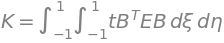

In [4]:
# Inicia as variáveis t, nu e E
t, v, E = symbols("t nu E")

# Inicia uma variável para representar E como uma matriz 3 x 3
E_m = MatrixSymbol("E", 3, 3)

# Define a matriz E
E_matriz = simplify((E/(1 - v**2)) * Matrix([[1, v,        0],
                                             [v, 1,        0],
                                             [0, 0, (1 -v)/2]]))

# Inicia uma variável para representar K como uma matriz 8 x 8
K = MatrixSymbol("K", 8, 8)

# Mostra o equacionamento de K
display(Eq(K, Integral(t * B.T * E_m * B, (qsi, -1, 1), (eta, -1, 1)), evaluate=False))

Seguindo com os cálculos:

In [5]:
# Inicia o cálculo pela multiplicação das variáveis abaixo
K_matriz = B.T * E_m * B

# Substitui as variáveis pelas matrizes correspondentes
K_matriz = K_matriz.subs({E_m: E_matriz, B: B_matriz}).doit()

# Multiplica por t
K_matriz = t * K_matriz

# Executa a integração
K_matriz = K_matriz.integrate((qsi, -1, 1), (eta, -1, 1))

# Simplifica o resultado tanto quanto possível
K_matriz = simplify(K_matriz)

# Mostra a matriz de rigidez local
display(K_matriz)

⎡2⋅E⋅t⋅(ν - 3)     -E⋅t          -2⋅E⋅ν⋅t     E⋅t⋅(3⋅ν - 1)   E⋅t⋅(3 - ν)     
⎢─────────────  ────────────   ─────────────  ─────────────  ─────────────  ──
⎢   2 ⎛ 2    ⎞     2              2 ⎛ 2    ⎞     2 ⎛ 2    ⎞     2 ⎛ 2    ⎞    
⎢3⋅l ⋅⎝ν  - 1⎠  2⋅l ⋅(ν - 1)   3⋅l ⋅⎝ν  - 1⎠  2⋅l ⋅⎝ν  - 1⎠  3⋅l ⋅⎝ν  - 1⎠  2⋅
⎢                                                                             
⎢   -E⋅t        2⋅E⋅t⋅(ν - 3)  E⋅t⋅(1 - 3⋅ν)   E⋅t⋅(ν + 3)       E⋅t        -E
⎢────────────   ─────────────  ─────────────  ─────────────  ────────────   ──
⎢   2              2 ⎛ 2    ⎞     2 ⎛ 2    ⎞     2 ⎛ 2    ⎞     2             
⎢2⋅l ⋅(ν - 1)   3⋅l ⋅⎝ν  - 1⎠  2⋅l ⋅⎝ν  - 1⎠  3⋅l ⋅⎝ν  - 1⎠  2⋅l ⋅(ν - 1)   3⋅
⎢                                                                             
⎢  -2⋅E⋅ν⋅t     E⋅t⋅(1 - 3⋅ν)  2⋅E⋅t⋅(ν - 3)      E⋅t         E⋅t⋅(ν + 3)   E⋅
⎢─────────────  ─────────────  ─────────────  ────────────   ─────────────  ──
⎢   2 ⎛ 2    ⎞     2 ⎛ 2    ⎞     2 ⎛ 2    ⎞     2  

Fatorando o que é cabível, têm-se como expressão final para a matriz de rigidez local a seguinte equação:

$$
K = \frac{tE}{l^{2}(\nu -1)} \left[\begin{matrix}\frac{2 \left(\nu - 3\right)}{3 \left(\nu + 1\right)} & - \frac{1}{2} & - \frac{2 \nu}{3 \nu + 3} & \frac{3 \nu - 1}{2 \left(\nu + 1\right)} & \frac{1 - \frac{\nu}{3}}{\nu + 1} & \frac{1}{2} & \frac{\nu + 3}{3 \left(\nu + 1\right)} & - \frac{3 \nu - 1}{2 \nu + 2}\\- \frac{1}{2} & \frac{2 \left(\nu - 3\right)}{3 \left(\nu + 1\right)} & - \frac{3 \nu - 1}{2 \nu + 2} & \frac{\nu + 3}{3 \left(\nu + 1\right)} & \frac{1}{2} & \frac{1 - \frac{\nu}{3}}{\nu + 1} & \frac{3 \nu - 1}{2 \left(\nu + 1\right)} & - \frac{2 \nu}{3 \nu + 3}\\- \frac{2 \nu}{3 \nu + 3} & - \frac{3 \nu - 1}{2 \nu + 2} & \frac{2 \left(\nu - 3\right)}{3 \left(\nu + 1\right)} & \frac{1}{2} & \frac{\nu + 3}{3 \left(\nu + 1\right)} & \frac{3 \nu - 1}{2 \left(\nu + 1\right)} & \frac{1 - \frac{\nu}{3}}{\nu + 1} & - \frac{1}{2}\\\frac{3 \nu - 1}{2 \left(\nu + 1\right)} & \frac{\nu + 3}{3 \left(\nu + 1\right)} & \frac{1}{2} & \frac{2 \left(\nu - 3\right)}{3 \left(\nu + 1\right)} & - \frac{3 \nu - 1}{2 \nu + 2} & - \frac{2 \nu}{3 \nu + 3} & - \frac{1}{2} & \frac{1 - \frac{\nu}{3}}{\nu + 1}\\\frac{1 - \frac{\nu}{3}}{\nu + 1} & \frac{1}{2} & \frac{\nu + 3}{3 \left(\nu + 1\right)} & - \frac{3 \nu - 1}{2 \nu + 2} & \frac{2 \left(\nu - 3\right)}{3 \left(\nu + 1\right)} & - \frac{1}{2} & - \frac{2 \nu}{3 \nu + 3} & \frac{3 \nu - 1}{2 \left(\nu + 1\right)}\\\frac{1}{2} & \frac{1 - \frac{\nu}{3}}{\nu + 1} & \frac{3 \nu - 1}{2 \left(\nu + 1\right)} & - \frac{2 \nu}{3 \nu + 3} & - \frac{1}{2} & \frac{2 \left(\nu - 3\right)}{3 \left(\nu + 1\right)} & - \frac{3 \nu - 1}{2 \nu + 2} & \frac{\nu + 3}{3 \left(\nu + 1\right)}\\\frac{\nu + 3}{3 \left(\nu + 1\right)} & \frac{3 \nu - 1}{2 \left(\nu + 1\right)} & \frac{1 - \frac{\nu}{3}}{\nu + 1} & - \frac{1}{2} & - \frac{2 \nu}{3 \nu + 3} & - \frac{3 \nu - 1}{2 \nu + 2} & \frac{2 \left(\nu - 3\right)}{3 \left(\nu + 1\right)} & \frac{1}{2}\\- \frac{3 \nu - 1}{2 \nu + 2} & - \frac{2 \nu}{3 \nu + 3} & - \frac{1}{2} & \frac{1 - \frac{\nu}{3}}{\nu + 1} & \frac{3 \nu - 1}{2 \left(\nu + 1\right)} & \frac{\nu + 3}{3 \left(\nu + 1\right)} & \frac{1}{2} & \frac{2 \left(\nu - 3\right)}{3 \left(\nu + 1\right)}\end{matrix}\right]
$$

Definida esta variável, o próximo passo para a determinação dos deslocamentos da malha é a montagem da matriz de rigidez geral. Assumindo como premissa que cada deslocamento local de um nó no elemento deve ser igual ao deslocamento global do nó na malha e que a soma das forças que agem sobre ele são nulas, chega-se à conclusão de que a matriz de rigidez geral é a soma das matrizes de rigidez locais expandidas para o total de graus de liberdade da malha. Na prática, expandir matrizes consome muita memória, então é preferível utilizar métodos de montagem mais computacionalmente efetivos como os apresentados em <citar data-cite="cuvelier2016efficient">[alg_montagem]</citar>.

Os deslocamentos são determinados através da solução do sistema linear de equações representado matricialmente por $\mathbf{f} = K_{\text{global}} \ \mathbf{u}$ dadas as condições de contorno do problema ($u_x = u_y = 0$ para os nós da borda e $f_x = f_y = 0$ para os nós fora dela com exceção do nó em (2, 0.5) onde $f_x = 0$ e $f_y = -P$).

## Operadores Genéticos

Uma execução típica do algoritmo genético empregado neste ensaio é como descrita abaixo. A totalidade do código utilizado pode ser encontrado [neste repositório](https://github.com/gustavomello9600/otag).

In [ ]:
# Define uma semente para o gerador de números aleatórios
mudar_semente(0)

# Inicializa uma população de projetos
pop = População_de_Projetos()

# Faz as gerações da população avançarem
pop.avançar_gerações(300)

Ao definir uma semente, garante-se a replicabilidade dos resultados para aquela população. Iniciando-la, 100 genes são gerados através do particionamento aleatório do espaço de projeto em polígonos rectilíneos de espessura interna mínima igual a $4 \times \frac{1}{38}$ respeitadas as exigências do problema, isto é, conter uma região com conexão à borda esquerda e ao ponto de aplicação da força, e os padrões seguidos por <citar data-cite="kane1996topological">[ecole]</citar> e <citar data-cite="ghaddar1995analysis">[pol_rect]</citar>.

A cada geração, o código abaixo é executado.

In [ ]:
# Ensina o Python a determinar os indivíduos da próxima geração
def próxima_geração(pop):
    
    # Aumenta o índice da geração
    pop.geração += 1
        
    # Aplica o operador de seleção natural
    indivíduos_selecionados = pop.seleção_natural()
    
    # Aplica o operador de reprodução nos indivíduos selecionados
    nova_geração            = pop.reprodução(indivíduos_selecionados)

    # Aplica o operador de mutação nos indivíduos da nova geração 
    pop.mutação(nova_geração)

    # Junta e ordena por adaptação os indivíduos
    # que comporão a geração corrente
    novos_indivíduos = indivíduos_selecionados + nova_geração
    novos_indivíduos.sort(reverse=True)
    
    # Adiciona a geração ao histórico de gerações
    self.gerações.append(novos_indivíduos)
    
    # Determina os indivíduos da geração corrente
    self.indivíduos    = novos_indivíduos
        
    # Retorna a população, agora com sua nova geração de indivíduos
    return self

### Seleção Natural

Todos os indivíduos ainda não testados tem sua adaptação mensurada de acordo com a seguinte função:

$$
\mathcal{F} = \frac{\displaystyle 1}{\displaystyle A_{\text{con}} + \epsilon A_{\text{des}} + \alpha (D_{\text{max}} - D_{\text{lim}})^{+}}
$$

$A_{\text{con}}$ e $A_{\text{des}}$ correspondem, respectivamente, à área total conectada e desconectada. $\alpha$ e $\epsilon$ são parâmetros de penalização. $D_{\text{max}}$ é o deslocamento máximo calculado com base na análise por elementos finitos e $D_{\text{lim}}$ é o deslocamento limite do problema. É interessante ressaltar que o peso próprio do material é ignorado.

$\alpha$ tem um valor diferente para cada geração, determinado pela equação: $\displaystyle \alpha = \alpha_0 \cdot (1 + \beta)^i$ com $\alpha_0 = 10$, $\beta = 1\%$ e $i$ equivalente ao índice da geração corrente. Este comportamento permite que a limitação de deslocamento seja menos penosa no início do algoritmo, o que proporciona maior variabilidade genética, e que se torne progressivamente mais estrita.

Arbitrariamente, porém com a tentativa de assemelhar os resultados aos obtidos em <citar data-cite="kane1996topological">[ecole]</citar>, tomou-se os seguintes valores para os parâmetros do problema. 

|                 Variável                    |      Símbolo     | Valor | Unidade |
|:-------------------------------------------:|:----------------:|:-----:|:-------:|
|          Deslocamento <br> limite           | $D_{\text{lim}}$ |   5   |    mm   |
|            Módulo de <br> Young             |        $E$       |  210  |   GPa   |
|             Carga <br> aplicada             |        $P$       |  100  |   kPa   |
|           Lado do <br> elemento             |        $l$       | 1/38  |    m    |
|         Espessura <br> do elemento          |        $t$       |   10  |    cm   |
|        Coeficiente <br> de Poysson          |       $\nu$      |  0.3  |    -    |
| Penalização <br> sob área <br> desconectada |     $\epsilon$   |  0.4  |    -    |

Os indivíduos são ranqueados de acordo com as maiores adaptações e os 50 mais aptos são selecionados.

### Reprodução

Dentre os indivíduos selecionados, dois são escolhidos aleatoriamente com probabilidades proporcionais às suas adaptações e um novo indivíduo filho é gerado a partir de um crossover dos genes dos indivíduos pais. A operação de crossover segue o padrão adotado e discutido por <citar data-cite="kane1996topological">[ecole]</citar>: 2 cortes verticais e 2 cortes horizontais subdividem os genes dos pais em 9 blocos dentre os quais 3 são trocados entre o primeiro e o segundo para dar origem ao gene do filho. Este processo se repete 50 vezes para gerar 50 novos indivíduos.

### Mutação

Para cada bit de cada gene, a probabilidade de virar (ir de 0 para 1 ou de 1 para 0) depende do valor médio daquele bit em toda a população. Se este já convergiu, atribui-se uma probabilidade de 10% para que vire caso esteja em discordância com a média da população e de 0,01% caso esteja em concordância. Todos os indivíduos provenientes da reprodução passam por esse processo. Seu efeito prático, na maioria das vezes, é o de introduzir "buracos" dentro das regiões contínuas e de limpar o material genético que não compõe o fenótipo do gene.

# Análise do Método

## Considerações sobre a execução do algoritmo

Analisando uma execução típica do algoritmo através de um perfilador de código, percebe-se que a etapa que demanda mais tempo de processamento é a testagem da adaptação de cada indivíduo, mais especificamente a análise por elementos finitos. Nela, duas sub-etapas são as mais custosas: a montagem da matriz de rigidez geral e a resolução do sistema $\mathbf{f} = K_{\text{global}} \ \mathbf{u}$.

A montagem foi bastante otimizada a partir do algoritmo OptV2 (sigla para segunda opção de otimização vetorizada) descrito em <citar data-cite="cuvelier2016efficient">[alg_montagem]</citar> e teve seu tempo de execução reduzida ao ponto em que seu principal gargalo é a velocidade de interpretação do Python.
    
A resolução do sistema linear é despachada para subrotinas paralelizadas administradas pelo NumPy (Numerical Python) e roda em velocidade similar àquela de códigos compilados. Três backends foram testados: o Intel MKL (Math Kernel Library), o BLAS (Basic Linear Algebra Subprograms) e o OpenBLAS (Versão de código-aberto do BLAS). Em diferentes computadores, diferentes backends alcançam a melhor performance. Os resultados deste ensaio são provenientes da execução do algoritmo em uma máquina com processador i3 de terceira geração com disponibilidade de 4 GB de RAM onde o backend OpenBLAS se mostrou mais veloz. Em uma instalação leve e limpa de uma distribuição linux, o uso de CPU ficou sempre próximo de 100% com a utilização de memória RAM próxima aos 900 MB.
    
O tempo de resolução do sistema linear supera em mais de 4 vezes o tempo de montagem da matriz de rigidez geral que por sua vez é muito superior à execução do restante do algoritmo genético, que costuma rodar em centésimos de segundo por geração. Este perfil de execução permite concluir que, para máquinas simples, o maior gargalo é a resolução do sistema linear (onde cabe pouca ou quase nenhuma otimização além da que já foi feita) enquanto que em máquinas mais poderosas a lentidão do intérprete do Python toma o seu lugar (especialmente por conta da etapa de montagem da matriz de rigidez geral).
    
Nas configurações descritas no parágrafo anterior, 300 gerações são executadas em aproximadamente 40 minutos. A cada iteração, o tempo de execução cai uma vez que as malhas dos indivíduos se tornam menores e por algumas delas reaparecerem e terem suas adaptações definidas por valores armazenados em cache.
    
# Possíveis Próximos Passos

Os resultados obtidos ainda estão distantes de <citar data-cite="kane1996topological">[ecole]</citar> possivelmente devido a uma má escolha dos parâmetros do problema, à convergência precoce e à perda rápida de diversidade genética.

Uma possível solução é a seleção baseada em espécies onde se toma os indivíduos que possuam uma correlação genética maior ou igual a 70% como membros de uma delas e se permitam apenas 5 indivíduos por cada. Outra possibilidade é a introdução de um operador de catástrofe planejada como o proposto em <citar data-cite="rocha1999preventing">[portugal]</citar> que exclua os indivíduos com material genético redundante e os substitua por outros aleatoriamente gerados.

Implementadas estas funcionalidades, pode ser interessante rodar uma população composta dos genes campeões estabelecidos neste ensaio.
    
Faria bem, ainda, revisar os parâmetros para torná-los mais representativos de uma situação de projeto relevante.

\appendix
\appendixpage

\section{Genes e Malhas Campeões} \label{apendice}


\begin{figure}
\centering
    \includegraphics{apresentação_da_semente (1)}
\caption{Indivíduo mais bem adaptado da população começada com semente 1}
\label{semente1}
\end{figure}

\begin{figure}
\centering
    \includegraphics{apresentação_da_semente (2)}
\caption{Indivíduo mais bem adaptado da população começada com semente 2}
\label{semente2}
\end{figure}

\begin{figure}
\centering
    \includegraphics{apresentação_da_semente (3)}
\caption{Indivíduo mais bem adaptado da população começada com semente 3}
\label{semente3}
\end{figure}

\begin{figure}
\centering
    \includegraphics{apresentação_da_semente (4)}
\caption{Indivíduo mais bem adaptado da população começada com semente 4}
\label{semente4}
\end{figure}

\begin{figure}
\centering
    \includegraphics{apresentação_da_semente (5)}
\caption{Indivíduo mais bem adaptado da população começada com semente 5}
\label{semente5}
\end{figure}

\begin{figure}
\centering
    \includegraphics{apresentação_da_semente (6)}
\caption{Indivíduo mais bem adaptado da população começada com semente 6}
\label{semente6}
\end{figure}

\begin{figure}
\centering
    \includegraphics{apresentação_da_semente (7)}
\caption{Indivíduo mais bem adaptado da população começada com semente 7}
\label{semente7}
\end{figure}

\begin{figure}
\centering
    \includegraphics{apresentação_da_semente (8)}
\caption{Indivíduo mais bem adaptado da população começada com semente 8}
\label{semente8}
\end{figure}

\begin{figure}
\centering
    \includegraphics{apresentação_da_semente (9)}
\caption{Indivíduo mais bem adaptado da população começada com semente 9}
\label{semente9}
\end{figure}

\begin{figure}
\centering
    \includegraphics{apresentação_da_semente (10)}
\caption{Indivíduo mais bem adaptado da população começada com semente 10}
\label{semente10}
\end{figure}

